* ## Question1:

##### a)

In [18]:
import xarray as xr
data=xr.open_dataset("C:/Users/user/Desktop/CDAexam08/air.2m.mon.mean.nc")
print(data)

<xarray.Dataset> Size: 67MB
Dimensions:  (lat: 94, lon: 192, time: 934)
Coordinates:
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 768B 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-10-01
Data variables:
    air      (time, lat, lon) float32 67MB ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121012
    history:        created 97/10/04 by Hoop (netCDF2.3)\nConverted to chunke...
    title:          monthly mean air.2m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


In [127]:
air_temp=data["air"]
print(air_temp)

<xarray.DataArray 'air' (time: 934, lat: 94, lon: 192)> Size: 67MB
array([[[234.9819 , 234.92842, ..., 235.19838, 235.09033],
        [236.4642 , 236.53905, ..., 236.30875, 236.38678],
        ...,
        [256.7768 , 256.84772, ..., 256.6629 , 256.71967],
        [256.88358, 256.86517, ..., 256.91614, 256.90134]],

       [[237.22414, 237.29341, ..., 237.14105, 237.18138],
        [236.86035, 237.0452 , ..., 236.50345, 236.68175],
        ...,
        [237.08449, 237.08897, ..., 237.24312, 237.15414],
        [238.6531 , 238.54138, ..., 238.82759, 238.73589]],

       ...,

       [[265.4133 , 265.4233 , ..., 265.38583, 265.3992 ],
        [265.15253, 265.26917, ..., 264.925  , 265.03333],
        ...,
        [220.59584, 220.4475 , ..., 221.11084, 220.82834],
        [219.27415, 219.02168, ..., 219.70836, 219.49167]],

       [[259.92178, 259.99033, ..., 259.8008 , 259.85568],
        [258.86935, 259.0242 , ..., 258.58786, 258.7234 ],
        ...,
        [231.0484 , 231.09433, ..., 

##### b)

In [125]:
import numpy as np
mean_lat=air_temp.mean(dim="lat")
mean_lat_lon=A.mean(dim='lon')
print(mean_lat_lon)

<xarray.DataArray 'air' (time: 934)> Size: 4kB
array([276.91452, 275.80124, 275.3741 , 276.30005, 278.4601 , 279.44305,
       279.5978 , 279.74622, 278.35593, 277.89212, 277.58707, 276.75052,
       277.05557, 276.4081 , 275.6082 , 276.2333 , 278.11847, 279.65048,
       279.82306, 279.31143, 278.421  , 277.40982, 277.542  , 277.6849 ,
       276.8851 , 275.49356, 275.8579 , 276.70328, 278.28622, 279.60397,
       280.14484, 279.2129 , 277.96768, 277.16687, 276.89658, 277.00345,
       276.3013 , 275.23904, 275.40964, 276.7972 , 278.61072, 279.79562,
       280.13736, 279.3663 , 278.69675, 277.41138, 277.04147, 277.5461 ,
       277.35678, 276.36282, 275.3049 , 276.65195, 278.70694, 279.8455 ,
       280.02124, 279.53476, 278.53973, 277.32474, 277.4136 , 277.5584 ,
       276.99588, 276.2142 , 275.42722, 277.09607, 278.83432, 279.8111 ,
       280.3689 , 279.64185, 278.1446 , 277.47388, 277.65707, 277.55682,
       276.9529 , 275.65207, 275.25964, 276.4871 , 278.1576 , 279.43796,
    

##### c)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

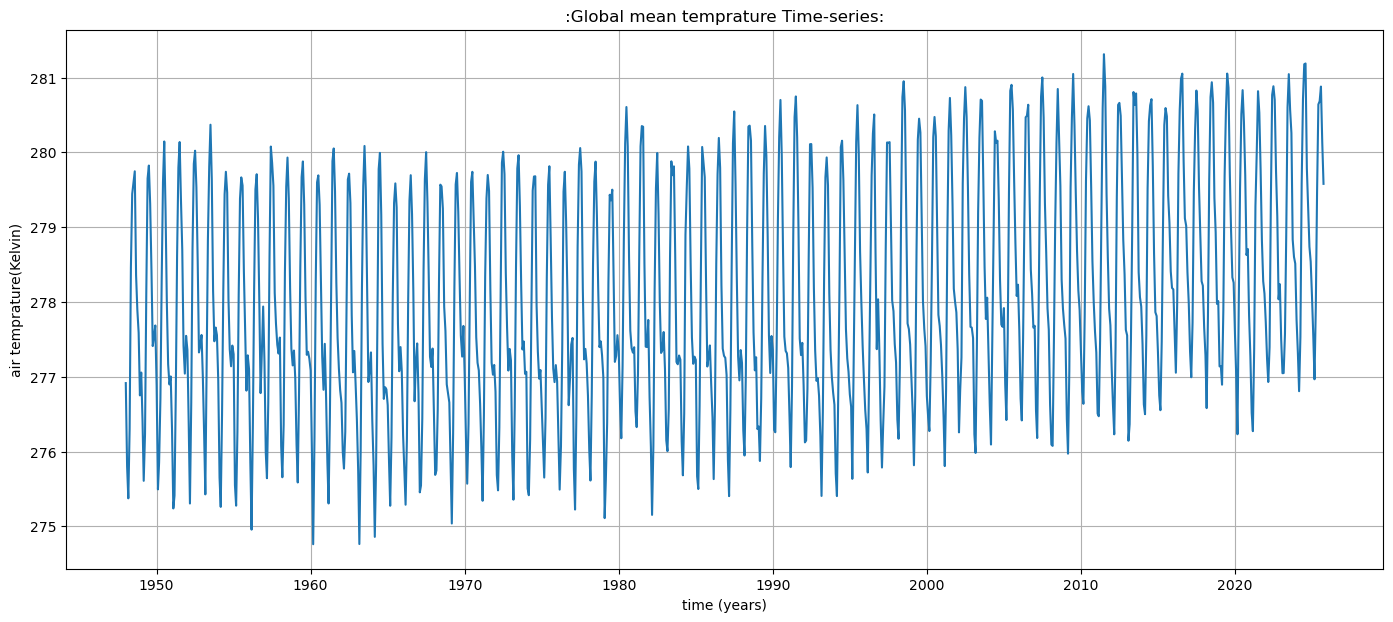

In [126]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(17,7))
mean_lat_lon.plot()
plt.title(":Global mean temprature Time-series:")
plt.xlabel("time (years)")
plt.ylabel("air temprature(Kelvin)")
plt.grid(True)
plt.tight_layout

#### d) Based on the visible features it can be seen that the minimum and maximum temprature both has increased in the later years than the previous years. No significant difference is seen in the seasonality.

* ## Question2:

##### a)

In [77]:
Period_A=air_temp.sel(time=slice('1948-01-01','1977-12-31'))
Period_B=air_temp.sel(time=slice('1995-01-01','2024-12-31'))
MA=Period_A.mean().item()
MB=Period_B.mean().item()
SA=np.sqrt(np.var(Period_A).item())
SB=np.sqrt(np.var(Period_B).item())
print("sample mean of Period A is:",MA)
print("sample mean of Period B is:",MB)
print("sample standard_deviation of Period A is:",SA)
print("sample standard_deviation of Period B is:",SB)

sample mean of Period A is: 277.6242980957031
sample mean of Period B is: 278.5531005859375
sample standard_deviation of Period A is: 23.589576928135813
sample standard_deviation of Period B is: 22.96682735362911


##### b)

In [93]:
from scipy.stats import t
tb=abs(t.ppf(0.975,360-1))
Lt_A=MA-tb*(SA/np.sqrt(360))
Ut_A=MA+tb*(SA/np.sqrt(360))
Lt_B=MB-tb*(SB/np.sqrt(360))
Ut_B=MB+tb*(SB/np.sqrt(360))
print('the 95% confidence interval for Period A is: ','[',Lt_A,",",Ut_A,']')
print('the 95% confidence interval for Period B is: ','[',Lt_B,",",Ut_B,']')

the 95% confidence interval for Period A is:  [ 275.1792714426189 , 280.0693247487873 ]
the 95% confidence interval for Period B is:  [ 276.17262105519063 , 280.93358011668437 ]


#### c)In this context 95% CI means that the true mean will lie on the interval 95% of the time each time we select

* ## Question3:

##### b)

In [115]:
from scipy.stats import f
fv2=abs(f.ppf(0.975,360-1,360-1))
fv1=abs(f.ppf(0.025,360-1,360-1))
TS=(SA/SB)**2                              #Test statistics
print('Lower limit:',fv1)
print('Upper limit:',fv2)
print('Test statistics:',TS)
print('Conclusion:','We accept the null hypothesis')

Lower limit: 0.8128450376329382
Upper limit: 1.2302467920725333
Test statistics: 1.0549655855433244
Conclusion: We accept the null hypothesis


##### a)

In [131]:
ta=abs(t.ppf(0.05,360+360-1))                   #degrees of freedom=360-1
Vp=((360-1)*(SA**2+SB**2))/(360+360-2)      #Pooled variance Vp=Sp**2
Sp=np.sqrt(Vp)
TS_m=(MA-MB)/(Sp*np.sqrt((1/30)+(1/30)))   #Test Statistics
print('Test Statistics:',TS_m)
print('degrees of freedom:',360+360-1)

Test Statistics: -0.15451858276922734
degrees of freedom: 719


#### c) The above test on variance implies that there is no significant difference in the variability of the two given data

* ## Question4:

In [55]:
d=air_temp.groupby('time.month').mean(dim='time')
print(d)
#plt.plot(1/f[:N//2],np.abs(FT_air_temp[:N//2]),color='blue')

<xarray.DataArray 'air' (month: 12, lat: 94, lon: 192)> Size: 866kB
array([[[240.79216, 240.77359, 240.75223, ..., 240.86646, 240.84462,
         240.81946],
        [240.78448, 240.85507, 240.92801, ..., 240.58356, 240.64668,
         240.71034],
        [241.61996, 241.9086 , 242.19516, ..., 240.79355, 241.06393,
         241.34134],
        ...,
        [252.94055, 253.18973, 253.43117, ..., 252.26907, 252.47418,
         252.702  ],
        [252.78531, 252.85211, 252.92155, ..., 252.6429 , 252.67986,
         252.72855],
        [252.50566, 252.47644, 252.44621, ..., 252.60141, 252.56976,
         252.53741]],

       [[240.79301, 240.78954, 240.78058, ..., 240.81859, 240.8106 ,
         240.80214],
        [240.8115 , 240.90254, 240.99023, ..., 240.56497, 240.64484,
         240.72871],
        [241.61954, 241.92784, 242.23836, ..., 240.75618, 241.03625,
         241.32477],
...
        [242.8035 , 243.04723, 243.29362, ..., 242.30481, 242.4286 ,
         242.59923],
        [242.

In [64]:
G=d.mean(dim='lat')
G1=G.mean(dim='lon')
(G1)

<xarray.DataArray 'air' (month: 12)> Size: 48B
array([277.09653, 276.25284, 275.86423, 276.88458, 278.6952 , 280.01205,
       280.28012, 279.9176 , 278.75412, 277.8185 , 277.53635, 277.50198],
      dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [65]:
FFT_data=np.fft.fft(G1)
print(FFT_data)

[ 3.33661411e+03+0.00000000e+00j -1.05555262e+01+3.01040829e+00j
  4.09085083e+00+2.56065275e+00j  8.65142822e-01+2.20764160e-01j
 -1.87438965e-01-2.33473768e-01j  1.39602116e-01+1.21441962e-02j
 -1.61041260e-01-2.22044605e-16j  1.39602116e-01-1.21441962e-02j
 -1.87438965e-01+2.33473768e-01j  8.65142822e-01-2.20764160e-01j
  4.09085083e+00-2.56065275e+00j -1.05555262e+01-3.01040829e+00j]


In [121]:
N=12
f=np.fft.fftfreq(N,d=1)
(f)

array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667, -0.5       , -0.41666667, -0.33333333, -0.25      ,
       -0.16666667, -0.08333333])

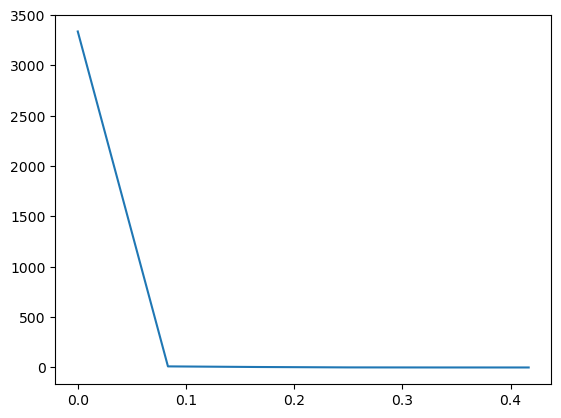

In [124]:
#Q=FFT_data.mean(dim='lat')
#print(Q)
#plt.plot(f[:N//2],np.abs(FFT_data[:N//2]),color='blue')
#plt.plot(f,np.abs(FFT_data))
c=abs(FFT_data)
(c)
plt.plot(f[:N//2],c[:N//2])

## Question2(Bonus):

In [134]:
X=air_temp['lat']
(X)

<xarray.DataArray 'lat' (lat: 94)> Size: 376B
array([ 88.542   ,  86.6531  ,  84.7532  ,  82.8508  ,  80.9473  ,  79.0435  ,
        77.1394  ,  75.2351  ,  73.3307  ,  71.4262  ,  69.5217  ,  67.6171  ,
        65.7125  ,  63.8079  ,  61.9033  ,  59.9986  ,  58.0939  ,  56.1893  ,
        54.2846  ,  52.3799  ,  50.4752  ,  48.5705  ,  46.6658  ,  44.7611  ,
        42.8564  ,  40.9517  ,  39.047   ,  37.1422  ,  35.2375  ,  33.3328  ,
        31.4281  ,  29.5234  ,  27.6186  ,  25.7139  ,  23.8092  ,  21.9044  ,
        19.9997  ,  18.095   ,  16.1902  ,  14.2855  ,  12.3808  ,  10.47604 ,
         8.57131 ,   6.66657 ,   4.76184 ,   2.8571  ,   0.952368,  -0.952368,
        -2.8571  ,  -4.76184 ,  -6.66657 ,  -8.57131 , -10.47604 , -12.3808  ,
       -14.2855  , -16.1902  , -18.095   , -19.9997  , -21.9044  , -23.8092  ,
       -25.7139  , -27.6186  , -29.5234  , -31.4281  , -33.3328  , -35.2375  ,
       -37.1422  , -39.047   , -40.9517  , -42.8564  , -44.7611  , -46.6658  ,
       -48.5705  , -50.4752  , -52.3799  , -54.2846  , -56.1893  , -58.0939  ,
       -59.9986  , -61.9033  , -63.8079  , -65.7125  , -67.6171  , -69.5217  ,
       -71.4262  , -73.3307  , -75.2351  , -77.1394  , -79.0435  , -80.9473  ,
       -82.8508  , -84.7532  , -86.6531  , -88.542   ], dtype=float32)
Coordinates:
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
Attributes:
    units:          degrees_north
    actual_range:   [ 88.542 -88.542]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [176]:
W=G1*(np.cos(np.deg2rad(X)))
(W)

<xarray.DataArray (month: 12, lat: 94)> Size: 5kB
array([[ 7.0505056, 16.177227 , 25.339396 , ..., 25.339396 , 16.177227 ,
         7.0505056],
       [ 7.029039 , 16.127972 , 25.262243 , ..., 25.262243 , 16.127972 ,
         7.029039 ],
       [ 7.0191507, 16.105284 , 25.226706 , ..., 25.226706 , 16.105284 ,
         7.0191507],
       ...,
       [ 7.0688763, 16.219378 , 25.405418 , ..., 25.405418 , 16.219378 ,
         7.0688763],
       [ 7.0616965, 16.202906 , 25.379616 , ..., 25.379616 , 16.202906 ,
         7.0616965],
       [ 7.060822 , 16.2009   , 25.376472 , ..., 25.376472 , 16.2009   ,
         7.060822 ]], dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54

In [177]:
o=sum(W)
NW=W/o             #normalisation
print(NW)
print(sum(NW))

<xarray.DataArray (month: 12, lat: 94)> Size: 5kB
array([[0.08304722, 0.08304721, 0.08304722, ..., 0.08304722, 0.08304721,
        0.08304722],
       [0.08279436, 0.08279435, 0.08279436, ..., 0.08279436, 0.08279435,
        0.08279436],
       [0.08267789, 0.08267789, 0.08267789, ..., 0.08267789, 0.08267789,
        0.08267789],
       ...,
       [0.08326361, 0.0832636 , 0.08326361, ..., 0.08326361, 0.0832636 ,
        0.08326361],
       [0.08317903, 0.08317903, 0.08317904, ..., 0.08317904, 0.08317903,
        0.08317903],
       [0.08316874, 0.08316874, 0.08316874, ..., 0.08316874, 0.08316874,
        0.08316874]], dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float32 376B 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
<xarray.DataArray (lat: 94)> Size: 376B
array([1.        , 0.99999994, 1.        , 0.9999999 , 1.        ,
       0.99999994, 1.        , 1.        , 1.0000001 , 1.        ,
       1.        , 1.        , 0

In [186]:
mn=G1.mean().weighted(sum(sum(NW)))
(mn)

DataArrayWeighted with weights along dimensions: 

In [153]:
v=air_temp.mean().item()
print(v)

278.0524597167969
